# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Erwin Durasow

Datum: 11.11.2023
Zuletzt geändert: 14.11.2023

Gruppe: 79

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie beeinflusst die Zugabe von warmem Wasser zu einem halbgefüllten Behälter mit kaltem Wasser die Mischungstemperatur, und wie lässt sich daraus die Wärmekapazität des Behälters mit dem kalten Wasser ableiten?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/heat_capacity_1.jpeg" width="800">
<img src="figures/heat_capacity_2.jpeg" width="800">
<img src="figures/heat_capacity_3.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py
import json

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
data_path = "data/data_heat_capacity/data_heat_capacity.h5"

# DONE #

In [58]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
with h5py.File(data_path, 'r') as file:
        # Read attributes from the root of the HDF5 file
        raw_data_group = file["RawData"]
        attributes = {
            'authors': file.attrs.get('authors', "Unknown"),
            'created': file.attrs.get('created', 'Unknown'),
            'experiment': file.attrs.get('experiment', 'Unknown'),
            'groupNumber': file.attrs.get('group_number', 'Unknown'),
        }
        print("Attributes:", attributes)
        temperature_data = []
        timestamp_data = []
        uuid_list = []
        names_list = []
        # Read experimental data from the 'RawData' group
        for i, uuid in enumerate(raw_data_group):
            uuid_group = raw_data_group[uuid]
            uuid_list.append(uuid)
            names_list.append(uuid_group.attrs.get("name"))
            # Read attributes from the UUID sensor group
            uuid_attributes = {
                'name': uuid_group.attrs.get('name', 'Unknown'),
                'serial_number': uuid_group.attrs.get('serial_number', 'Unknown'),
            }
            print(f"\nUUID: {uuid}")
            print("Sensor Attributes:", uuid_attributes)
          
            # Read temperature and timestamp datasets
            temperature_data.append(list(uuid_group['temperature'][:]))
            timestamp_data.append(list(uuid_group['timestamp'][:]))


# DONE #

Attributes: {'authors': 'Erwin Durasow', 'created': '2023-11-14 09:16:44', 'experiment': 'Kalometrie Kuechentischversuch', 'groupNumber': '79'}

UUID: 1ee80933-b1de-6061-95bf-7315bfd3f80f
Sensor Attributes: {'name': 'sensor_temperature_hot_cup', 'serial_number': '3ce10457bbc6'}

UUID: 1ee80935-9058-68c6-9ead-cef58130afc6
Sensor Attributes: {'name': 'sensor_temperature_cold_cup', 'serial_number': '3ce1e380b212'}


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


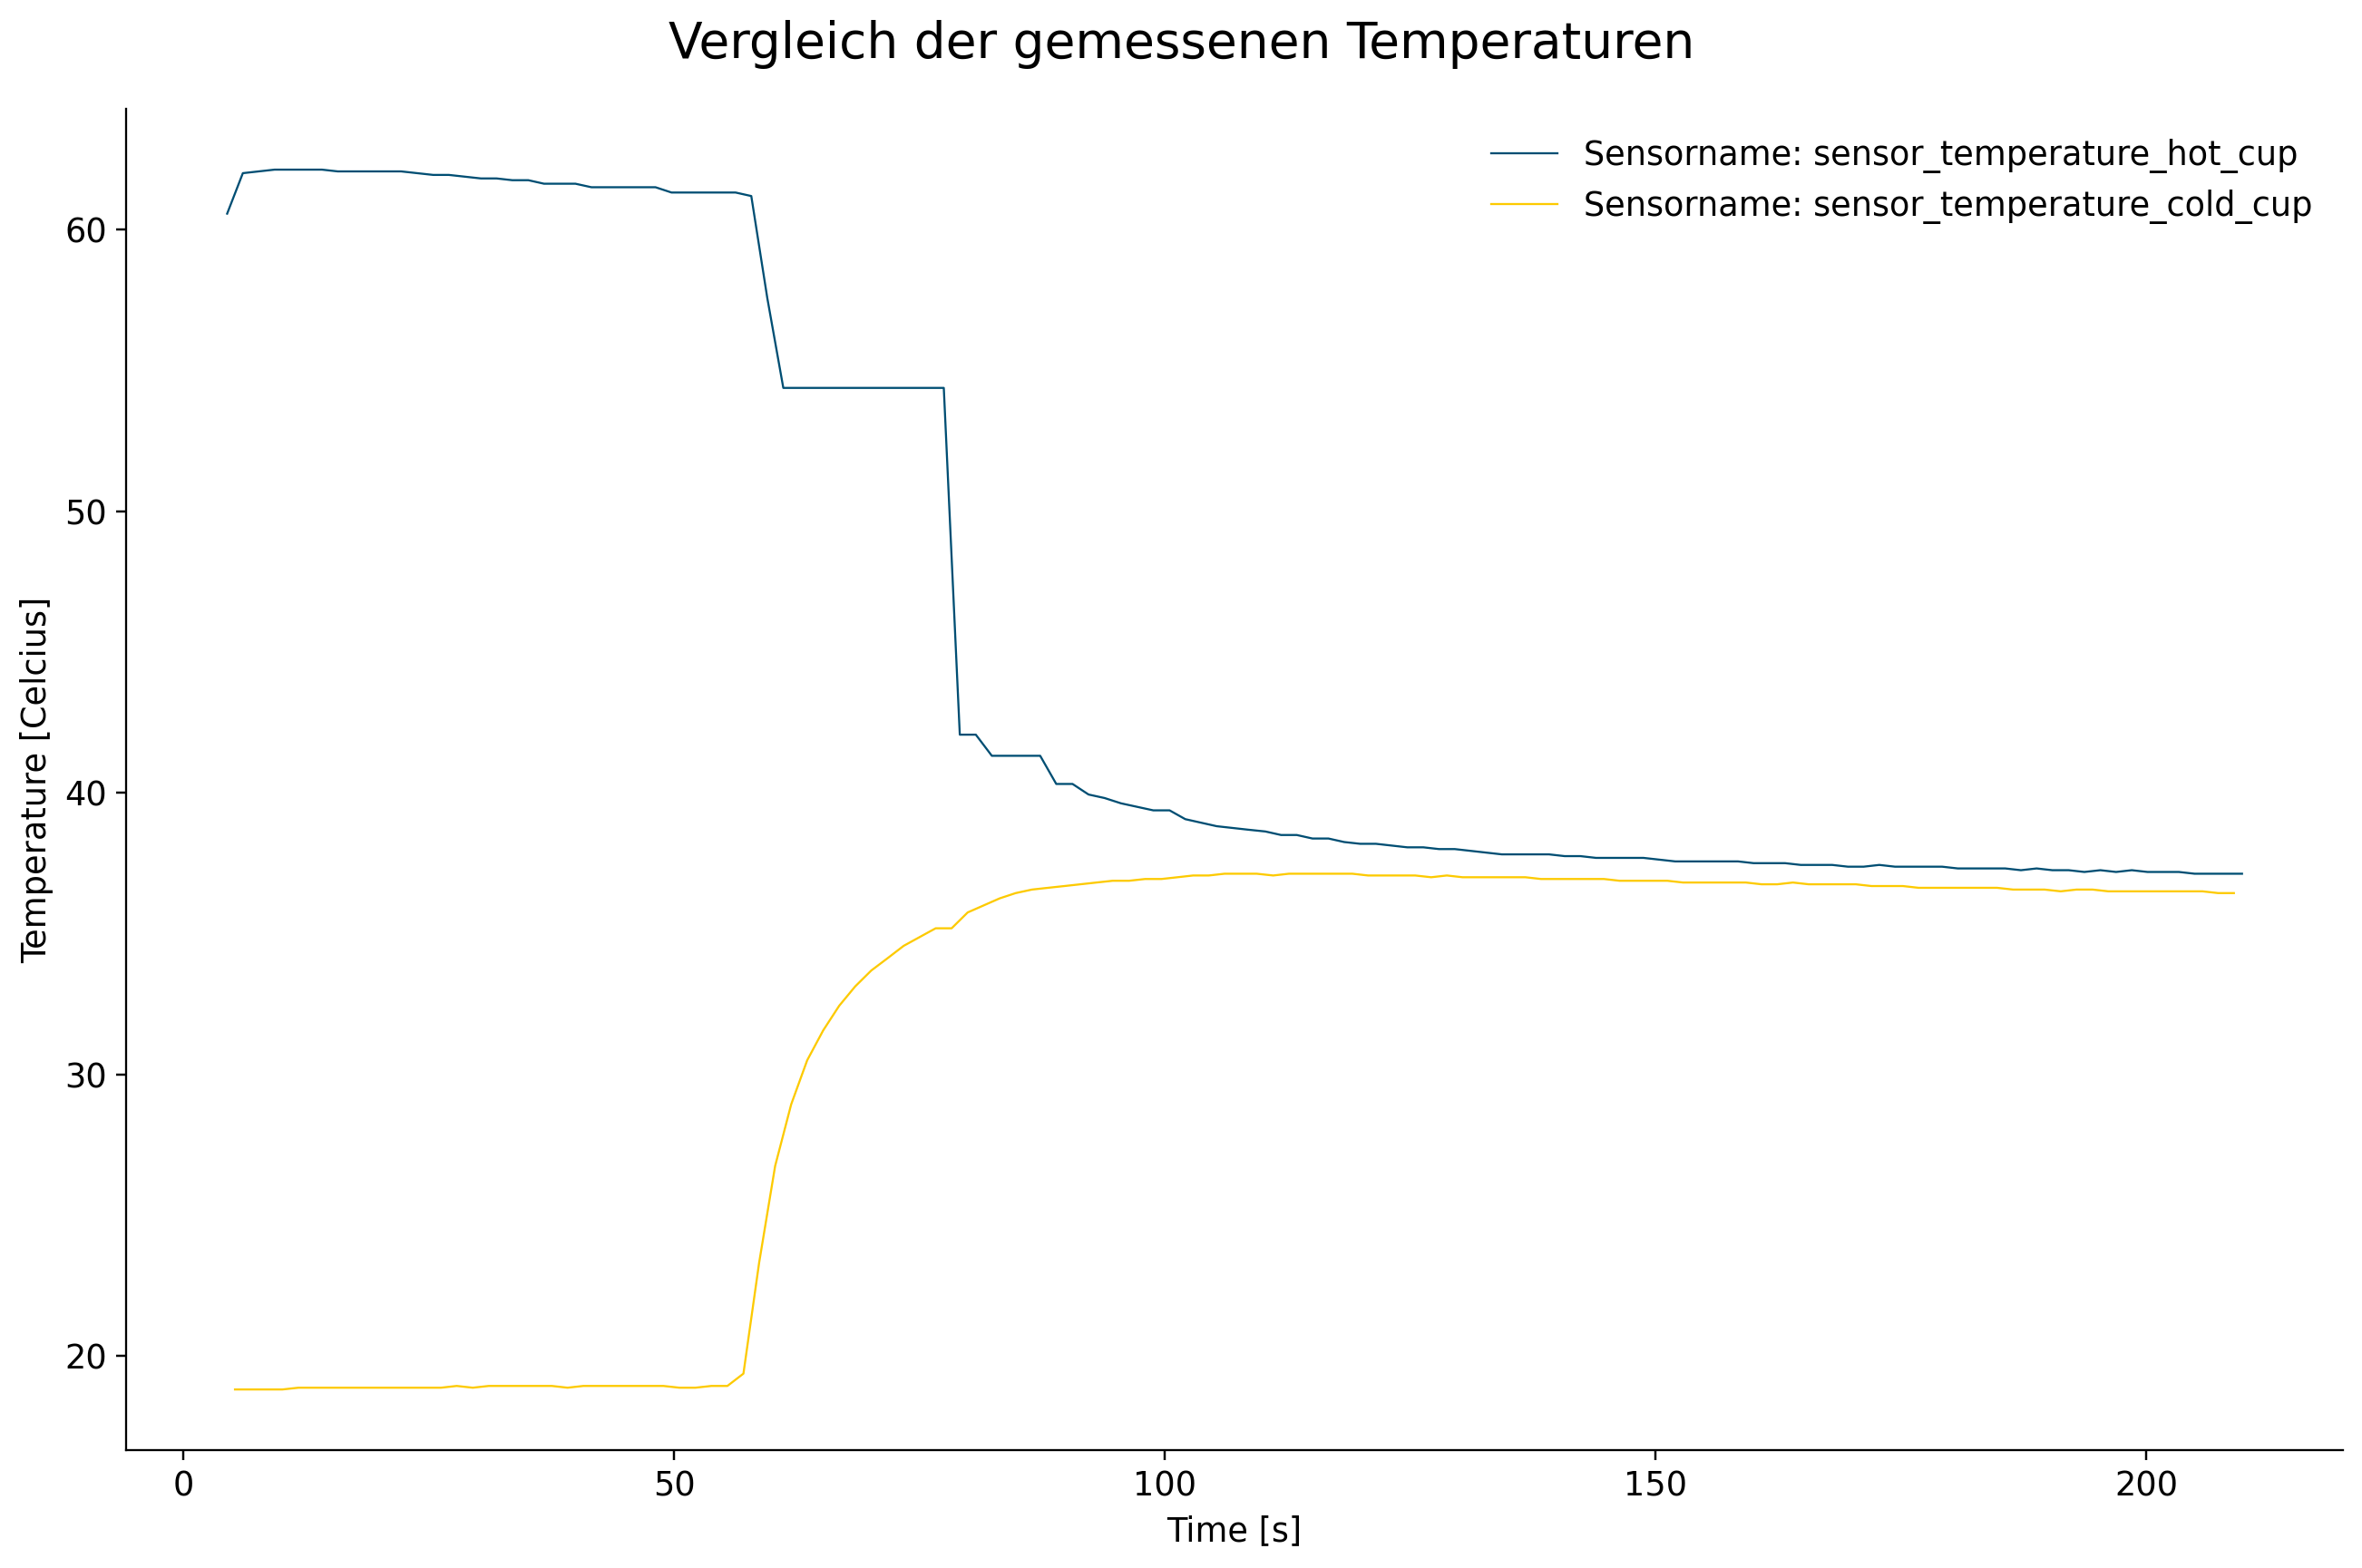

In [4]:
# TODO: Use the temperature and time data for plotting
# Erstellen des plots
fig, axes = plt.subplots(1, figsize=(12, 8))
fig.suptitle('Vergleich der gemessenen Temperaturen', fontsize = 18)
for i, uuid in enumerate(uuid_list):
    plt.plot(timestamp_data[i], temperature_data[i], label=f'Sensorname: {names_list[i]}')

# Configure the plot
plt.xlabel('Time [s]')
plt.ylabel('Temperature [Celcius]')
plt.legend()

# Farben für die Balken
colors = ['b', 'g']  # Blau und Grün

# Anzeigen der Subplots
plt.tight_layout()

# Speichern des Diagramms als SVG-Datei
plt.savefig('figures/temperature_heat_capacity.svg')

plt.show()

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [43]:
# Heat capacity of Water
heat_capacity_water = 4.18

# TODO: Read mass from the metadata of the experiment.
with open("datasheets/probe_heat_capacity.json", "r") as file:
    probe_metadata = json.load(file)["probe"]
m_cup = int(probe_metadata["mass_cup"])  
m_add = int(probe_metadata["mass_add"])
c_w = heat_capacity_water
print(m_cup,m_add,c_w)
# DONE #

200 200 4.18


#### (iV) Anfangs- und Endwert der Temperatur

In [44]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_2 = temperature_data[0][0]                                         # Anfangstemperatur des heißen Wassers
T_1 = temperature_data[1][0]                                         # Anfangstemperatur des kalten Wassers
T_M = abs((temperature_data[0][-1]+temperature_data[1][-1])/2)       # Mischtemperatur des heißen und kalten Wassers
print(T_M,T_1,T_2)
# DONE 

36.78125 18.8125 60.5625


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [47]:
# TODO: Calculate heat capacity of the calorimeter
C = (m_add*c_w*((T_2-T_M)/(T_M-T_1)))-m_cup*c_w
# DONE #

#### (Vi) Ergebnis

In [48]:
# TODO: Print result
print("The measured and calculated heat capacity of the calorimeter is ",C , "J/K" )

# DONE #

The measured and calculated heat capacity of the calorimeter is  270.42782608695643 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Als triviale Lösung könnte man erwarten, dass die Mischungstemperatur der Durchschnitt der Anfangstemperaturen ist:
$$
T_{expected} = (T_{1}+T_{2})/2  = (61.5+18.9375)/2  =  40.22
$$
Jedoch zeigt das Ergebniss des Experimentes, dass die Mischungstemperatur unter der Erwarteten liegt. Deshalb stellt sich die Frage wohin die Energie geflossen ist. Natürlich gibt es einen austausch von Wärme mit der Umgebung, den wir hier erstmal ignorieren. Was uns interisiert ist wie viel Energie die Tasse gefüllt mit kalten Wasser aufgenommen hat. Die Wärmekapazität der Tasse beträgt 0.270 J/K und zeigt somit dass die fehlende Energie in die Erwärmung der Tasse geflossen ist. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die Forschungsfrage zur Beeinflussung der Mischungstemperatur durch Zugabe von warmem Wasser zu einem halbgefüllten Behälter 
mit kaltem Wasser ist komplexer als zunächst angenommen. Die triviale Annahme, dass die Mischungstemperatur der Durchschnitt 
der Anfangstemperaturen ist, erweist sich als ungenau, da das Experiment eine niedrigere Mischungstemperatur zeigt.
Die Diskrepanz führt zu der Hypothese, dass die fehlende Energie in die Erwärmung des Behälters gefüllt mit kaltem Wasser geflossen ist.


Die vernachlässigte Umgebungswärmeaustausch könnte einen Einfluss auf das Experiment haben und sollte in zukünftigen 
Untersuchungen berücksichtigt werden. Die Wärmekapazität der Tasse, die hier als 0.270 J/K angenommen wird, spielt eine 
entscheidende Rolle bei der Erklärung der Energieverschiebung. Das Experiment zeigt, dass ein Teil der zugeführten Energie dazu
verwendet wird, die Tasse zu erwärmen, und nicht ausschließlich für die Erhöhung der Mischungstemperatur.

Insgesamt verdeutlicht diese Untersuchung die Notwendigkeit, alle potenziellen Einflussfaktoren bei der Analyse von 
Temperaturmischungsprozessen zu berücksichtigen und liefert eine Grundlage für weitere vertiefte Untersuchungen zur 
Wärmekapazität und Wärmeaustauschmechanismen in solchen Experimenten.